#Linear Regressions

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
np.random.seed(0)

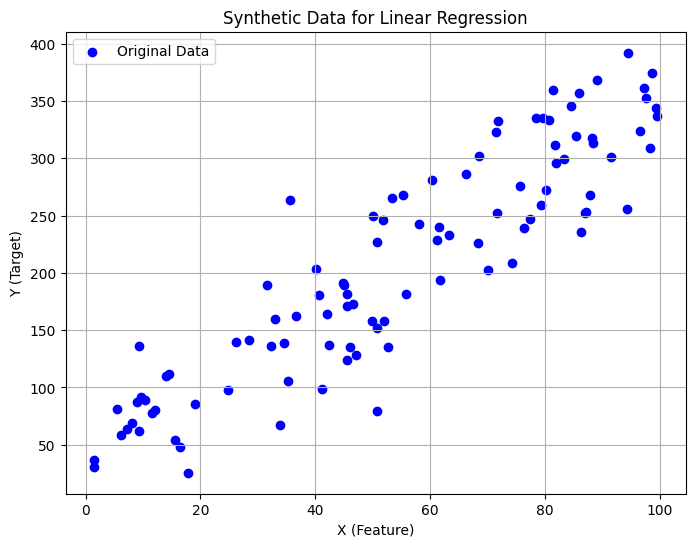

Generated X (first 5 rows):
 [[55.35419595]
 [ 5.44981555]
 [19.1202197 ]
 [60.40269334]
 [66.21836528]]
Generated Y (first 5 rows):
 [[268.26714912]
 [ 80.88249572]
 [ 85.92229305]
 [281.08451975]
 [285.97987815]]


In [ ]:
# Generate sample data
X = 100 * np.random.rand(100, 1) # Features
Y = 40 + 3 * X + 40 * np.random.randn(100, 1) # Target (linear relationship + noise)

# Visualize the generated data
plt.figure(figsize=(8, 6))
plt.scatter(X, Y, color='blue', label='Original Data')
plt.title('Synthetic Data for Linear Regression')
plt.xlabel('X (Feature)')
plt.ylabel('Y (Target)')
plt.grid(True)
plt.legend()
plt.show()

print("Generated X (first 5 rows):\n", X[:5])
print("Generated Y (first 5 rows):\n", Y[:5])

# Split data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

## Linear Regression
- $\theta$: parameters
- $\theta_j$ = jth parameters → $ℝ^{n+1}$ when n = # input
- m = # trainning examples
- x = inputs / features
- y = output / target
- $(x, y)$ = training examples
- $(x^{(i)}, y^{(i)} )$ = ith training examples

**Hypothesis Function**:  $h(x) = \theta_0+\theta_1x_1+\theta_2x_2+...$

**Cost Function**: $J(\theta) =\frac12\sum_{i=1}^m(h_\theta(x^i)-y^i)^2$

GOAL : choose Parameters s.t. $h(x) \approx y$ for target datas.

→ minimize Cost Function → gradient descent

## Batch Gradient Descent

(calcutating can be slow with huge dataset)

- start with random $\theta$ → keep changing $\theta$ to reduce $J(\theta)$

- Find partial derivative of $J(\theta)$:   $\frac{\delta}{\delta \theta_j}J(\theta) = (h_\theta(x)-y)⋅ x_j$

- $\theta_j ≔  \theta_j - \alpha (h_\theta(x)-y)⋅x_j$    ($\alpha$ as learning weight)

Repeat until convergence → find local optimal

In [ ]:
alpha = 0.0001
epoch = 100
intercept = np.random.rand() #theta 0
coefficient = np.random.rand(1,1) #theta 1

# Fit Model
for i in range(epoch):
  error = intercept + coefficient * X_train - Y_train
  intercept = intercept - alpha * np.mean(error)
  coefficient = coefficient - alpha * np.mean(error) * X_train
  #print(f"Epoch {i+1}: Intercept = {intercept:.2f}, Coefficient = {coefficient[0][0]:.2f}")

print(f"Intercept (theta_0): {intercept:.2f}")
print(f"Coefficient (theta_1): {coefficient[0][0]:.2f}")

Intercept (theta_0): 0.20
Coefficient (theta_1): 4.99


In [ ]:
# @title
#Make Predictions
Y_pred = intercept + coefficient * X_test

#Evaluate model
mse = mean_squared_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R2): {r2:.2f}")

Mean Squared Error (MSE): 2785.93
R-squared (R2): 0.73


## Stochastic gradient descent
update after use one data → memory efficient

Descending makes some noises but eventually goes to local minimum

In [ ]:
alpha = 0.0001
epoch = 100
intercept = np.random.rand() #theta 0
coefficient = np.random.rand() #theta 1

# Fit Model
for i in range(epoch):
  for j in range(len(X_train)):
    error = intercept + coefficient * X_train[j].item() - Y_train[j].item()
    intercept = intercept - alpha * error
    coefficient = coefficient - alpha * error * X_train[j].item()
  print(f"Epoch {i+1}: Intercept = {intercept:.2f}, Coefficient = {coefficient:.2f}")

print(f"Intercept (theta_0): {intercept:.2f}")
print(f"Coefficient (theta_1): {coefficient:.2f}")

Epoch 1: Intercept = 0.35, Coefficient = 3.35
Epoch 2: Intercept = 0.43, Coefficient = 3.35
Epoch 3: Intercept = 0.52, Coefficient = 3.35
Epoch 4: Intercept = 0.60, Coefficient = 3.35
Epoch 5: Intercept = 0.68, Coefficient = 3.34
Epoch 6: Intercept = 0.76, Coefficient = 3.34
Epoch 7: Intercept = 0.84, Coefficient = 3.34
Epoch 8: Intercept = 0.92, Coefficient = 3.34
Epoch 9: Intercept = 1.00, Coefficient = 3.34
Epoch 10: Intercept = 1.08, Coefficient = 3.34
Epoch 11: Intercept = 1.16, Coefficient = 3.34
Epoch 12: Intercept = 1.24, Coefficient = 3.34
Epoch 13: Intercept = 1.32, Coefficient = 3.34
Epoch 14: Intercept = 1.40, Coefficient = 3.33
Epoch 15: Intercept = 1.48, Coefficient = 3.33
Epoch 16: Intercept = 1.56, Coefficient = 3.33
Epoch 17: Intercept = 1.64, Coefficient = 3.33
Epoch 18: Intercept = 1.72, Coefficient = 3.33
Epoch 19: Intercept = 1.80, Coefficient = 3.33
Epoch 20: Intercept = 1.88, Coefficient = 3.33
Epoch 21: Intercept = 1.95, Coefficient = 3.33
Epoch 22: Intercept = 

In [ ]:
# @title
#Make Predictions
Y_pred = intercept + coefficient * X_test

#Evaluate model
mse = mean_squared_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R2): {r2:.2f}")

Mean Squared Error (MSE): 3388.32
R-squared (R2): 0.67


##Normal Equation
$\theta = (x^Tx)^{-1}x^Ty$

Derivation:
1. $x\theta = \text{(column vector)}x^{(i)^T}\theta =\text{(column vector)} h(x)$

2. $J(\theta) =\frac12\sum_{i=1}^m(h_\theta(x^i)-y^i)^2 = \frac12\sum_{i=1}^m(x\theta -y)^2$ (Matrix)

3. $\frac12\sum_{i=1}^m(x\theta -y)^2 = \frac12(x\theta - y)^T(x\theta - y)$

4. $\nabla_\theta \frac12(x\theta - y)^T(x\theta - y) = (x^Tx)^{-1}x^Ty$


### +) Linear algebra

- Derivative of Matrix function → partial derivative of each element of matrix

- trace of A → sum of diagonal entries, tr(A)

- $trA = trA^T$

- $trAB = trBA$,         $trABC = trCAB$

- $f(A) = trAB$  → $\nabla _A f(A) = B^T$

- $\nabla_A trAA^TC = CA+C^TA$

- $\sum_{i=1,\ j=i}^{i=n,\ j=m}(a_{ij})^2 = A^TA$

In [ ]:
# Add a bias (intercept) term to X_train
X_b_train = np.c_[np.ones((X_train.shape[0], 1)), X_train]

# Normal Equation
theta_normal = np.linalg.inv(X_b_train.T @ X_b_train) @ X_b_train.T @ Y_train

# Extract intercept and coefficient
intercept_normal = theta_normal[0][0]
coefficient_normal = theta_normal[1][0]

print(f"Intercept (theta_0) from Normal Equation: {intercept_normal:.2f}")
print(f"Coefficient (theta_1) from Normal Equation: {coefficient_normal:.2f}")

Intercept (theta_0) from Normal Equation: 40.86
Coefficient (theta_1) from Normal Equation: 3.03


In [ ]:
# @title
#Make Predictions
Y_pred = intercept_normal + coefficient_normal * X_test

#Evaluate model
mse = mean_squared_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R2): {r2:.2f}")

Mean Squared Error (MSE): 2630.99
R-squared (R2): 0.75


+) LinearRegression model from scikit

In [ ]:
# Create a Linear Regression model
model = LinearRegression()

# Train the model using the training sets
model.fit(X_train, Y_train)     # It actually uses Singular Value Decomposition (SVD)

# The intercept (theta_0)
print(f"Intercept (theta_0): {model.intercept_[0]:.2f}")
# The coefficient (theta_1)
print(f"Coefficient (theta_1): {model.coef_[0][0]:.2f}")

Intercept (theta_0): 47.47
Coefficient (theta_1): 2.92


In [ ]:
Y_pred = model.predict(X_test)
mse = mean_squared_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R2): {r2:.2f}")

Mean Squared Error (MSE): 6543.99
R-squared (R2): 0.53


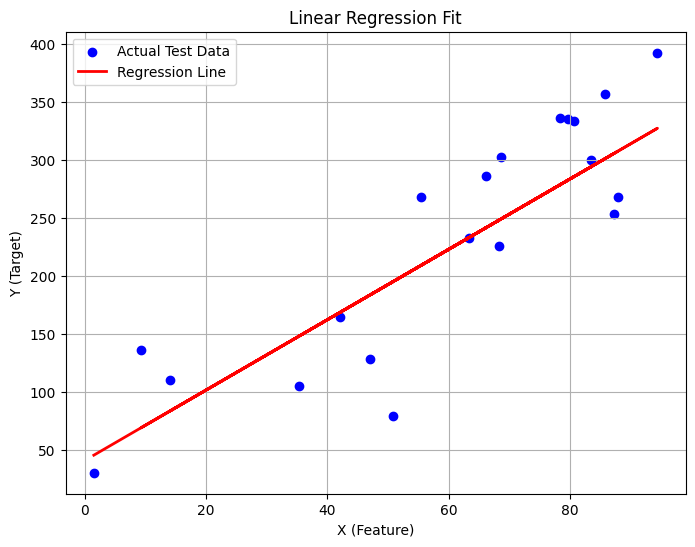

In [ ]:
# Plot the regression line
plt.figure(figsize=(8, 6))
plt.scatter(X_test, Y_test, color='blue', label='Actual Test Data')
plt.plot(X_test, Y_pred, color='red', linewidth=2, label='Regression Line')
plt.title('Linear Regression Fit')
plt.xlabel('X (Feature)')
plt.ylabel('Y (Target)')
plt.grid(True)
plt.legend()
plt.show()